# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Import passengers.csv and set it as a time-series object. Plot the TS
df = pd.read_csv('passengers.csv')
df.Month = pd.to_datetime(df.Month)
df.set_index('Month', inplace=True)
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [25]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
def stationarity_check(ts, window=12):
    """
    Provides a plot with original time series, rolling mean, and rolling standard deviation.
    Also returns results of Dickey-Fuller test for stationarity.
    
    Parameters
    ----------
    ts : dataframe (time series object)
        Time series object to check for stationarity
    window : int
        Size of the window to perform rolling mean and standard deviation calculations
        (Default = 12)
    
    Returns
    ----------
    Plot of time series, rolling mean of time series, and rolling standard deviation of time series.
    
    Results of Dickey-Fuller test for stationarity.
    
    """
    from statsmodels.tsa.stattools import adfuller
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    # Calculate rolling mean
    rolmean = ts.rolling(window=window).mean()
    
    # Calculate rolling std
    rolstd = ts.rolling(window=window).std()
    
    # Plot original data, rolling mean, rolling std in one plot
    fig = plt.figure(figsize=(10,8))
    plt.plot(ts, label='Original Data')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling STD')
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.ylabel('Passengers')
    plt.title('Rolling Mean and Rolling Standard Devation of Time Series Data')
    plt.show();
    
    #Perform Dickey-Fuller test:
    tstest = adfuller(ts['#Passengers'])

    # Extract and display test results in a user friendly manner
    print(f'''
    Results of Dickey-Fuller Test:
    Test Statistic:\t{tstest[0]}
    p-value:\t{tstest[1]}
    Lags Used:\t{tstest[2]}
    Number of Observations Used:\t{tstest[3]}''')
    print('\tCritical Value(1%):\t{}'.format(tstest[4]['1%']))
    print('\tCritical Value(5%):\t{}'.format(tstest[4]['5%']))
    print('\tCritical Value(10%):\t{}'.format(tstest[4]['10%']))

Use your newly created function on the airpassenger data set.

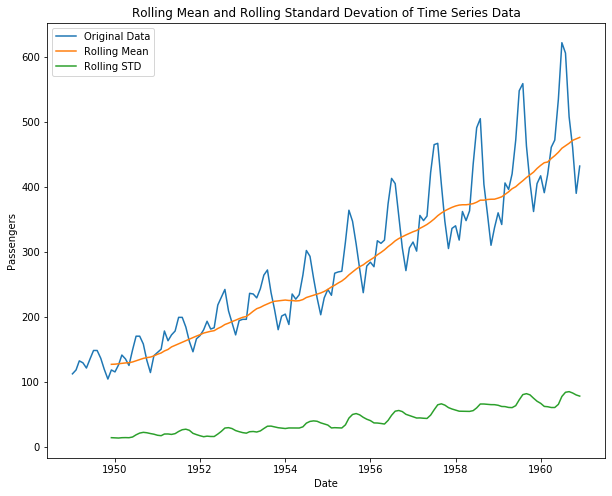


    Results of Dickey-Fuller Test:
    Test Statistic:	0.8153688792060543
    p-value:	0.9918802434376411
    Lags Used:	13
    Number of Observations Used:	130
	Critical Value(1%):	-3.4816817173418295
	Critical Value(5%):	-2.8840418343195267
	Critical Value(10%):	-2.578770059171598


In [26]:
stationarity_check(df, window=12)

## Perform a log() and sqrt() transform

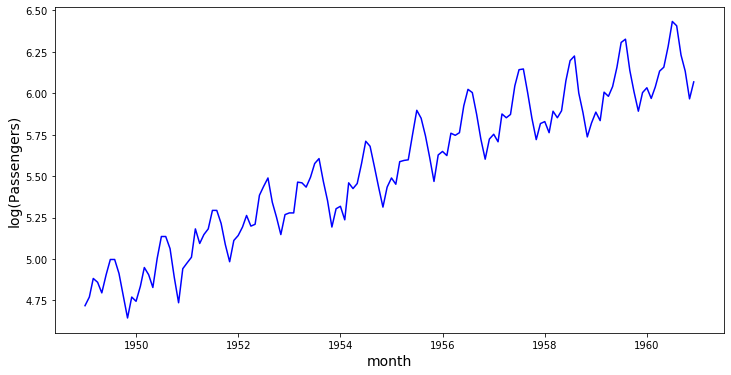

In [27]:
# Log transform timeseries and compare with original to check the effect
df_log = np.log(df)
fig = plt.figure(figsize=(12,6))
plt.plot(df_log, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(Passengers)", fontsize=14)
plt.show()

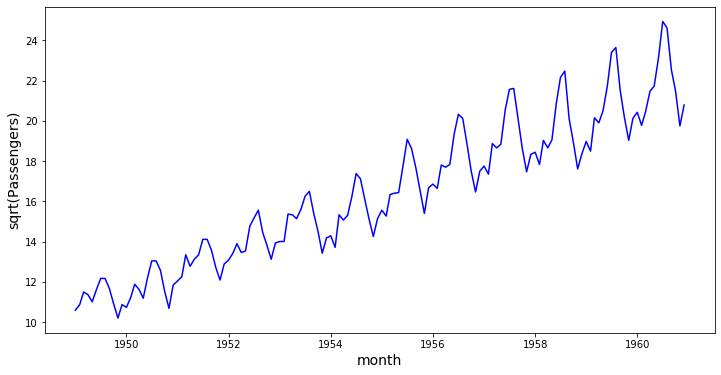

In [28]:
# sqrt transform timeseries and compare with original to check the effect
df_sqrt = np.sqrt(df)
fig = plt.figure(figsize=(12,6))
plt.plot(df_sqrt, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("sqrt(Passengers)", fontsize=14)
plt.show()

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

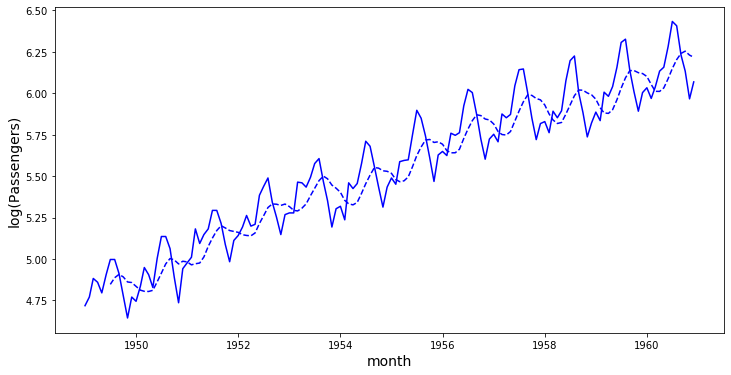

In [29]:
# your code here
rolmean = df_log.rolling(window=7).mean()

fig = plt.figure(figsize=(12,6))
plt.plot(df_log, color="blue", label='Log Tranformed Data')
plt.plot(rolmean, color="blue", linestyle='--')
plt.xlabel("month", fontsize=14)
plt.ylabel("log(Passengers)", fontsize=14)
plt.show()

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [30]:
# Subtract the moving average from the original data and check head for Nans
df_log_mean = df_log - rolmean
df_log_mean.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,0.150059
1949-08-01,0.110242
1949-09-01,0.005404


In [31]:
# Drop the NaN values from timeseries calculated above
df_log_mean.dropna(inplace=True)

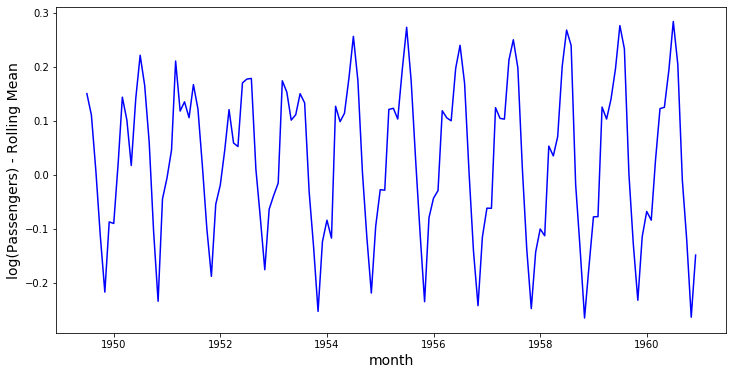

In [32]:
# Plot the result
fig = plt.figure(figsize=(12,6))
plt.plot(df_log_mean, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(Passengers) - Rolling Mean", fontsize=14)
plt.show()

Finally, use your function `check_stationarity` to see if this series is considered stationary!

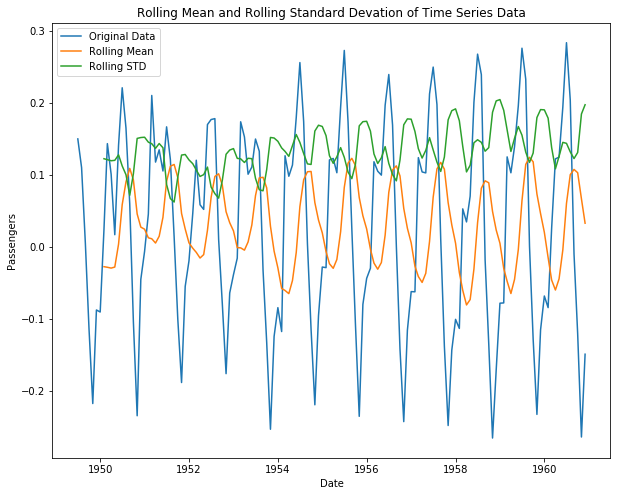


    Results of Dickey-Fuller Test:
    Test Statistic:	-2.3480270028588084
    p-value:	0.15694559814096715
    Lags Used:	14
    Number of Observations Used:	123
	Critical Value(1%):	-3.4846672514209773
	Critical Value(5%):	-2.8853397507076006
	Critical Value(10%):	-2.5794629869786503


In [69]:
stationarity_check(df_log_mean, window=8)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


# Your conclusion here
The time series is still not stationary at the 95% confidence level. This is probably because the standard deviation is increasing with time.

## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

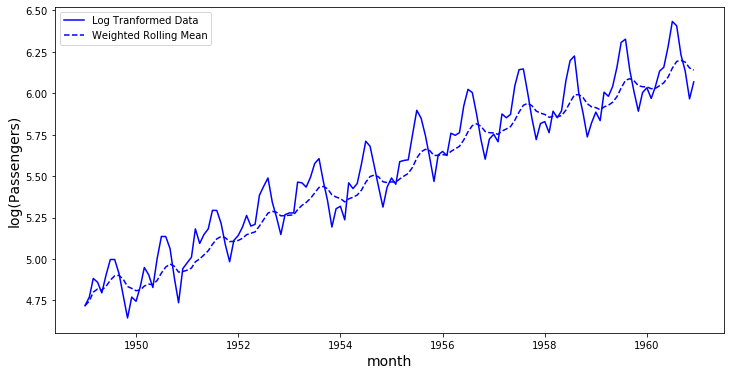

In [70]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
w_rolmean = df_log.ewm(halflife=4).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,6))
plt.plot(df_log, color="blue", label='Log Tranformed Data')
plt.plot(w_rolmean, color="blue", linestyle='--', label='Weighted Rolling Mean')
plt.xlabel("month", fontsize=14)
plt.ylabel("log(Passengers)", fontsize=14)
plt.legend()
plt.show()

In [71]:
# Subtract the moving average from the original data and plot
df_log_wmean = df_log - w_rolmean
df_log_wmean.head()

,#Passengers
Month,
1949-01-01,0.000000
1949-02-01,0.023838
1949-03-01,0.082598
1949-04-01,0.040640
1949-05-01,-0.016963


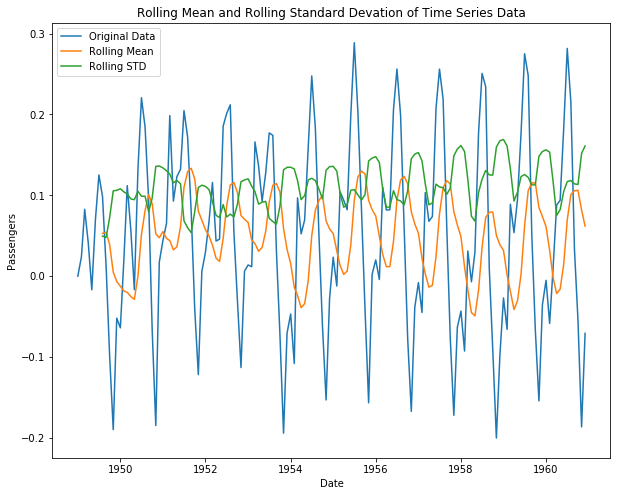


    Results of Dickey-Fuller Test:
    Test Statistic:	-3.2972503220375127
    p-value:	0.015001833471825855
    Lags Used:	13
    Number of Observations Used:	130
	Critical Value(1%):	-3.4816817173418295
	Critical Value(5%):	-2.8840418343195267
	Critical Value(10%):	-2.578770059171598


In [74]:
# do a stationarity check
stationarity_check(df_log_wmean, window=8)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


# Your conclusion here
The time series appears to be stationary at alpha = 0.05.

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [75]:
# difference your data and look at the head
df_diff = df_log_wmean.diff(periods=12)

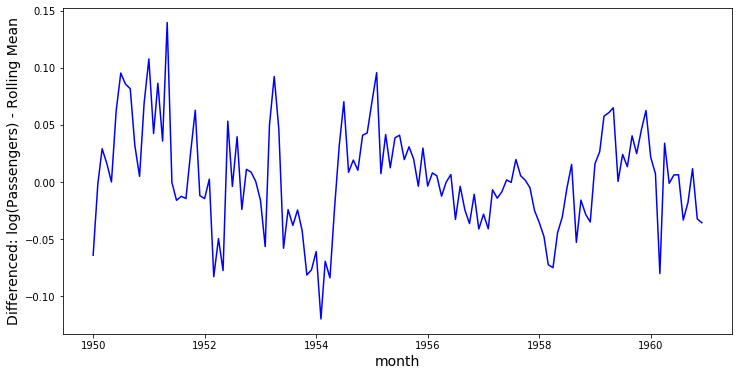

In [76]:
# plot your differenced time series
fig = plt.figure(figsize=(12,6))
plt.plot(df_diff, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("Differenced: log(Passengers) - Rolling Mean", fontsize=14)
plt.show()

In [77]:
# drop nas
df_diff.dropna(inplace=True)

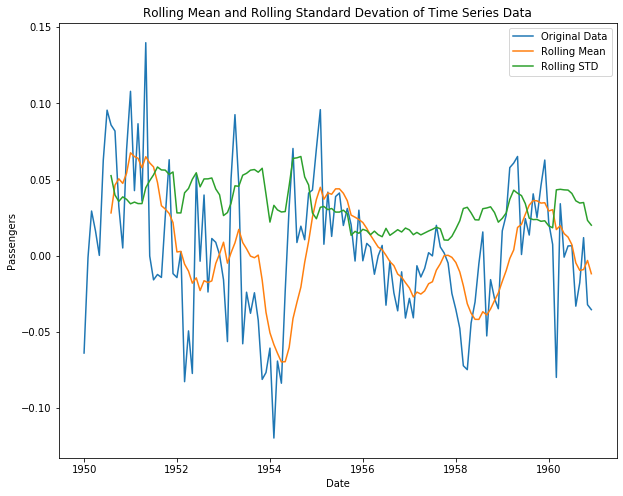


    Results of Dickey-Fuller Test:
    Test Statistic:	-3.601666483537999
    p-value:	0.00572924796974271
    Lags Used:	12
    Number of Observations Used:	119
	Critical Value(1%):	-3.4865346059036564
	Critical Value(5%):	-2.8861509858476264
	Critical Value(10%):	-2.579896092790057


In [79]:
# perform the stationarity check
stationarity_check(df_diff, window=8)

### Your conclusion

# Your conclusion here
We can reject the null hypothesis that the time series is not stationary at alpha = 0.05. Time series can be assumed to be stationary for further testing.

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.